#### Import libraries

In [217]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import f_oneway
from scipy import stats 
from sklearn.cluster import KMeans

#### Downloaded the Fama-French dataset

In [218]:
famafrench = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows = 3)
famafrench = famafrench.rename(columns={'Unnamed: 0': 'Date'})
famafrench = famafrench[famafrench['Date']>20091231]
famafrench

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
11707,20100104,1.69,0.79,1.13,-0.18,0.21,0.0
11708,20100105,0.31,-0.41,1.24,-0.20,0.19,0.0
11709,20100106,0.13,-0.13,0.57,-0.05,0.20,0.0
11710,20100107,0.40,0.25,0.98,-0.69,0.22,0.0
11711,20100108,0.33,0.32,0.01,0.22,-0.37,0.0
...,...,...,...,...,...,...,...
14723,20211227,1.22,-0.11,0.28,0.97,0.47,0.0
14724,20211228,-0.27,-0.41,0.80,0.83,0.21,0.0
14725,20211229,0.06,-0.01,0.15,0.67,-0.01,0.0
14726,20211230,-0.15,0.06,-0.38,-0.82,-0.41,0.0


#### Created the SP500 tickers list

In [219]:
tickers=[] 
resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = bs.BeautifulSoup(resp.text)
table = soup.find("table", {"class":"wikitable sortable"}) #find table
for row in table.findAll("tr")[1:]: #for each table row except headers/titles
    ticker = row.findAll("td")[0].text[:-1] #in each row we want the table data, the first column, the name
    tickers.append(ticker)

modified_tickers=[] 
for x in tickers:
    x=x.replace('.', '-') 
    modified_tickers.append(x)

#### Performed the OLS regression

In [220]:
alpha = []
beta1=[]
beta2=[]
beta3=[]
beta4=[]
beta5=[]

t_alpha=[]
t_beta1=[]
t_beta2=[]
t_beta3=[]
t_beta4=[]
t_beta5=[]

r_sqrd=[]

excluded =[]

start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

for i in modified_tickers:
    try:
        df = web.DataReader(i, "yahoo", start, end)
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(famafrench['RF'][-ss:])

    X = famafrench[['Mkt-RF', 'SMB','HML','RMW', 'CMA' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    alpha.append(est.params[0])
    beta1.append(est.params[1])
    beta2.append(est.params[2])
    beta3.append(est.params[3])
    beta4.append(est.params[4])
    beta5.append(est.params[5])

    t_alpha.append(est.tvalues[0])
    t_beta1.append(est.tvalues[1])
    t_beta2.append(est.tvalues[2])
    t_beta3.append(est.tvalues[3])
    t_beta4.append(est.tvalues[4])
    t_beta5.append(est.tvalues[5])

    r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
EXCLUDING:CEG
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL


#### Created the df containing all the regression parameters for each ticker

In [221]:
for i in excluded:
    modified_tickers.remove(i)

In [222]:
OLS = pd.DataFrame()

OLS['Ticker'] = modified_tickers
OLS['Alpha']=alpha
OLS['Beta1']=beta1
OLS['Beta2']=beta2
OLS['Beta3']=beta3
OLS['Beta4']=beta4
OLS['Beta5']=beta5
OLS['T_alpha']=t_alpha
OLS['T_beta1']=t_beta1
OLS['T_beta2']=t_beta2
OLS['T_beta3']=t_beta3
OLS['T_beta4']=t_beta4
OLS['T_beta5']=t_beta5
OLS['R-squared']=r_sqrd

OLS

,Ticker,Alpha,Beta1,Beta2,Beta3,Beta4,Beta5,T_alpha,T_beta1,T_beta2,T_beta3,T_beta4,T_beta5,R-squared
0,MMM,-0.025972,0.922246,0.001201,0.108525,0.471795,0.431968,-1.582280,56.951802,0.040611,3.791722,10.996040,7.266977,0.558266
1,AOS,0.021716,0.976488,0.469290,0.029587,0.343371,0.202386,0.949164,43.263173,11.380519,0.741658,5.741662,2.442710,0.463359
2,ABT,0.006013,0.878301,-0.364557,-0.302177,0.028632,0.265999,0.334378,49.507539,-11.247687,-9.636868,0.609127,4.084598,0.465750
3,ABBV,0.014744,0.876466,-0.092346,-0.184029,-0.017704,0.078222,0.470200,28.341662,-1.676402,-3.527450,-0.216862,0.713436,0.279260
4,ABMD,0.061128,0.980350,0.447073,-0.577654,-0.586890,-0.197632,1.287320,20.927061,5.223666,-6.976560,-4.728316,-1.149279,0.203093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,0.005388,0.882305,-0.041083,0.056338,0.394075,-0.004401,0.240311,39.886509,-1.016579,1.440973,6.723694,-0.054203,0.373858
500,ZBRA,0.022588,1.172781,0.426599,-0.260019,0.145308,-0.019977,0.718883,37.833054,7.532593,-4.745755,1.769156,-0.175562,0.383062
501,ZBH,-0.025879,0.868765,0.189590,0.183557,0.129501,-0.250416,-1.114835,37.935332,4.531345,4.534811,2.134207,-2.978826,0.393998
502,ZION,0.020701,0.988328,0.305267,1.580878,-0.696192,-0.625354,0.892600,43.197029,7.303026,39.092854,-11.484277,-7.445943,0.666762


#### Computed the descriptive statistics for each regressor

In [223]:
for i in OLS.columns[1:]:
    data = OLS[i]
    
    print(pd.DataFrame(data.describe()), '\n', '\n')

            Alpha
count  504.000000
mean    -0.001899
std      0.034734
min     -0.139700
25%     -0.017884
50%     -0.002531
75%      0.014066
max      0.340576 
 

            Beta1
count  504.000000
mean     1.003277
std      0.212549
min      0.421892
25%      0.857630
50%      1.004086
75%      1.150252
max      1.656113 
 

            Beta2
count  504.000000
mean     0.139407
std      0.313385
min     -1.066326
25%     -0.106308
50%      0.120606
75%      0.333473
max      1.455868 
 

            Beta3
count  504.000000
mean     0.186255
std      0.505152
min     -0.954439
25%     -0.160147
50%      0.107366
75%      0.434443
max      1.790144 
 

            Beta4
count  504.000000
mean     0.105171
std      0.361981
min     -2.003718
25%     -0.099193
50%      0.161806
75%      0.366571
max      1.045844 
 

            Beta5
count  504.000000
mean    -0.014515
std      0.444915
min     -1.579455
25%     -0.264672
50%      0.028685
75%      0.279539
max      1.437749 
 

    

#### Computed the nonparametric density estimates for each regressor

C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


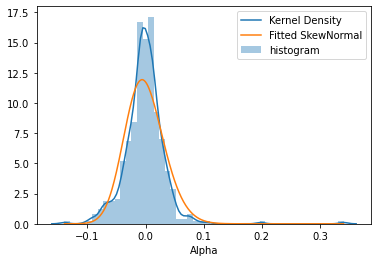

μ = -0.0018
σ = 0.03473
ξ = 2.01139
κ = 20.8244




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


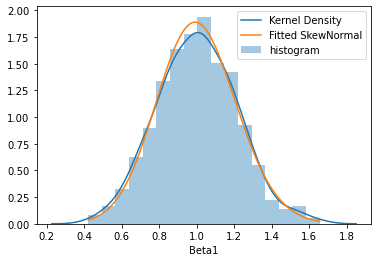

μ = 1.00327
σ = 0.21254
ξ = 0.11473
κ = 0.00210




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


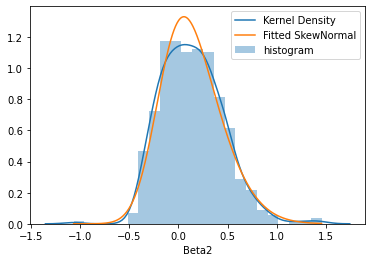

μ = 0.13940
σ = 0.31338
ξ = 0.51641
κ = 0.96027




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


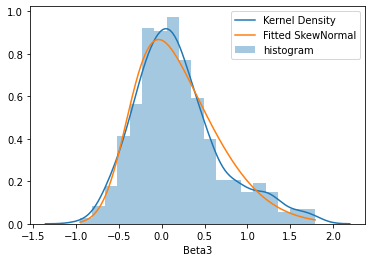

μ = 0.18625
σ = 0.50515
ξ = 0.82985
κ = 0.63615




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


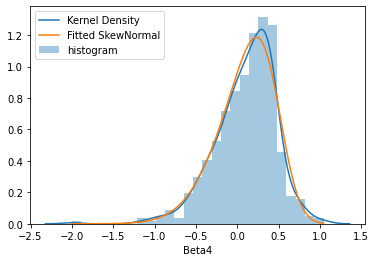

μ = 0.10517
σ = 0.36198
ξ = -0.9209
κ = 2.49004




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


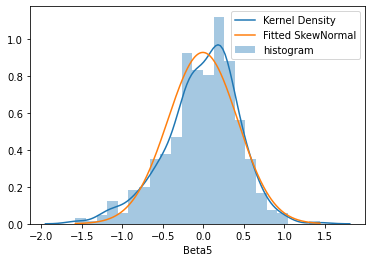

μ = -0.0145
σ = 0.44491
ξ = -0.5156
κ = 0.62682




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


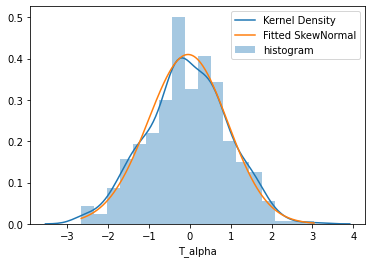

μ = -0.0703
σ = 0.97729
ξ = -0.0676
κ = -0.1633




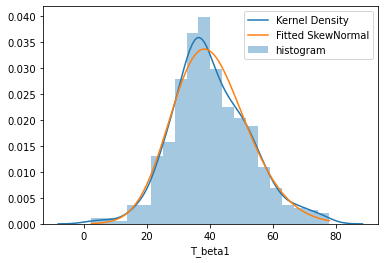

μ = 40.4636
σ = 12.1626
ξ = 0.32488
κ = 0.41495




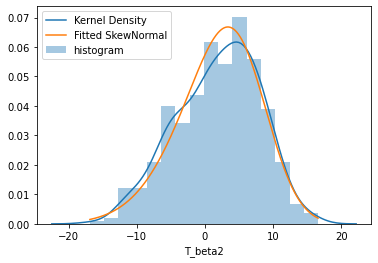

μ = 1.85441
σ = 6.09841
ξ = -0.3177
κ = -0.3878




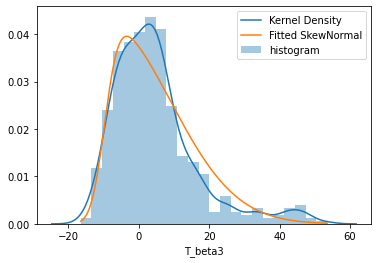

μ = 4.56941
σ = 12.0607
ξ = 1.50040
κ = 2.79984




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


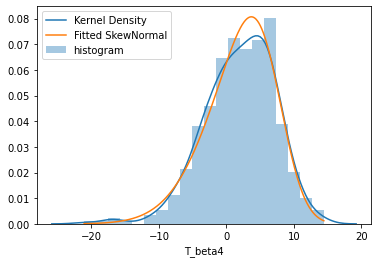

μ = 1.95197
σ = 5.22879
ξ = -0.6462
κ = 1.05929




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


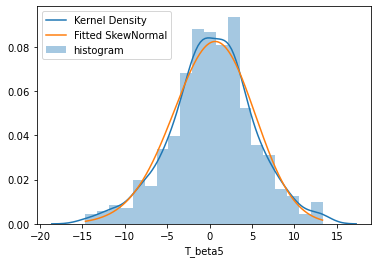

μ = 0.27815
σ = 4.88467
ξ = -0.1508
κ = 0.37021




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


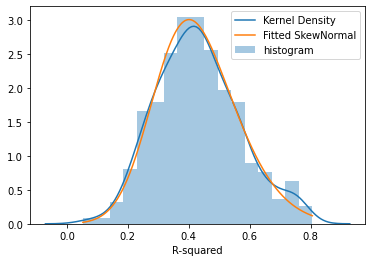

μ = 0.43018
σ = 0.13710
ξ = 0.32355
κ = -0.0779




In [224]:
for i in OLS.columns[1:14]:
    data = OLS[i]
    
    mu = str(data.mean())
    sd = str(data.std())
    skew = str(data.skew())
    kurt = str(data.kurt())
    
    params = skewnorm.fit(data, 10, loc=80, scale=40)
    
    ax = sns.distplot(data, kde_kws={'label':'Kernel Density'}, label='histogram')

    # draw the pdf of the fitted skewnorm
    x = np.linspace(data.min(), data.max(), 500)
    ax.plot(x, skewnorm.pdf(x, *params), label='Fitted SkewNormal')
    plt.legend()
    plt.show()
    
    
    print('μ = ' + mu[0:7])
    print('σ = ' + sd[0:7])
    print('ξ = ' + skew[0:7])
    print('κ = ' + kurt[0:7])
    print('\n')
    

#### Analyzed the differences among sectors with the ANOVA test

In [226]:
GICS=[] 
resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = bs.BeautifulSoup(resp.text)
table = soup.find("table", {"class":"wikitable sortable"})
for row in table.findAll("tr")[1:]:
    if row.findAll("td")[0].text[:-1] not in excluded:
        GICS.append(row.findAll("td")[3].text[:])
    else:
        continue

for i in range(len(GICS)):
    if GICS[i] == 'Communication Services\n':
        GICS[i] = 'Communication Services'

In [ ]:
OLS['GICS'] = GICS

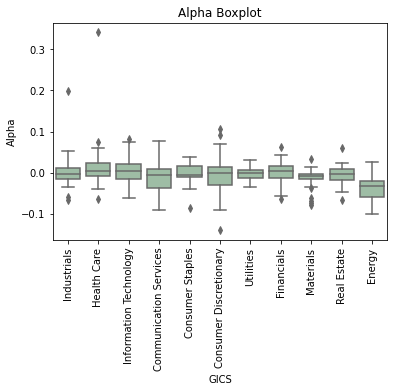

P-value of all having same Alpha is 1.6520276398417195e-06 
 
 
 



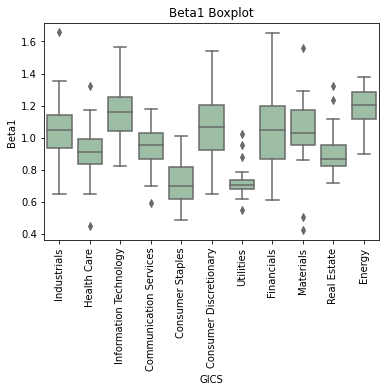

P-value of all having same Beta1 is 1.6844756771949064e-47 
 
 
 



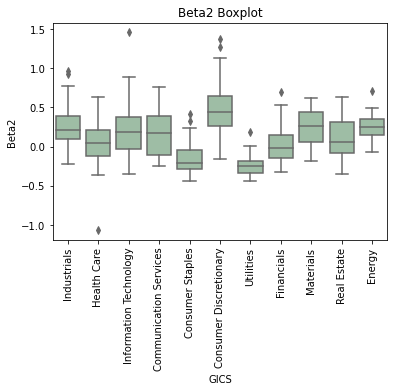

P-value of all having same Beta2 is 2.1918540204082238e-36 
 
 
 



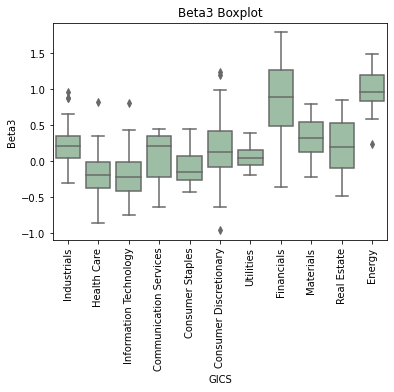

P-value of all having same Beta3 is 2.680773763999377e-73 
 
 
 



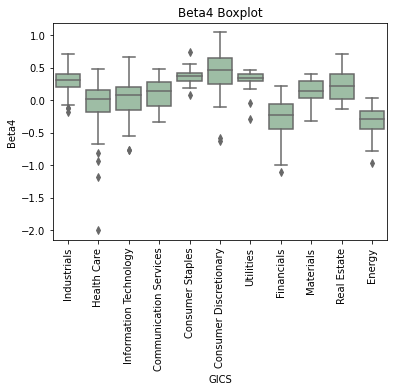

P-value of all having same Beta4 is 3.0812276679010456e-56 
 
 
 



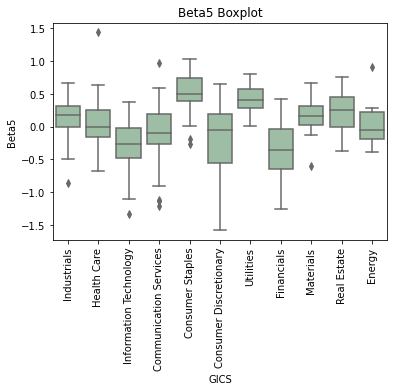

P-value of all having same Beta5 is 3.7505595415615156e-39 
 
 
 



In [230]:
sampleCOM = OLS[OLS['GICS']=='Communication Services']
sampleCD = OLS[OLS['GICS']=='Consumer Discretionary']
sampleCS = OLS[OLS['GICS']=='Consumer Staples']
sampleEN = OLS[OLS['GICS']=='Energy']
sampleFI = OLS[OLS['GICS']=='Financials']
sampleHC = OLS[OLS['GICS']=='Health Care']
sampleIN = OLS[OLS['GICS']=='Industrials']
sampleIT = OLS[OLS['GICS']=='Information Technology']
sampleMA = OLS[OLS['GICS']=='Materials']
sampleRE = OLS[OLS['GICS']=='Real Estate']
sampleUT = OLS[OLS['GICS']=='Utilities']

for i in OLS.columns[1:7]:
    ax = sns.boxplot(x='GICS', y=i, data=OLS, color='#99c2a2')
    plt.title(i + ' Boxplot')
    plt.xticks(rotation=90)
    plt.show()
    
    fvalue, pvalue = f_oneway(sampleCOM[i], sampleCD[i], sampleCS[i], sampleEN[i], sampleFI[i], sampleHC[i], sampleIN[i],
                                   sampleIT[i], sampleMA[i], sampleRE[i], sampleUT[i])
    print('P-value of all having same ' + i +' is ' + str(pvalue), '\n', '\n','\n','\n')

#### Performed the t-test analysis pairwise

In [231]:
res = [(a, b) for idx, a in enumerate(OLS['GICS'].unique()) for b in OLS['GICS'].unique()[idx + 1:]]
len(res)

55

In [232]:
pairs = []
alpha_p=[]
beta1_p=[]
beta2_p=[]
beta3_p=[]
beta4_p=[]
beta5_p=[]


for i in range(0,len(res)):
    Sector1 = res[i][0]
    Sector2 = res[i][1]
    
    for k in OLS.columns[1:7]:

        SS1 = OLS[OLS['GICS']==Sector1][k]
        SS2 = OLS[OLS['GICS']==Sector2][k]

        tvalue, pvalue = stats.ttest_ind(SS1, SS2)
        
        if k == 'Alpha':
            alpha_p.append(pvalue)
        elif k == 'Beta1':
            beta1_p.append(pvalue)
        elif k == 'Beta2':
            beta2_p.append(pvalue)
        elif k == 'Beta3':
            beta3_p.append(pvalue)
        elif k == 'Beta4':
            beta4_p.append(pvalue)
        elif k == 'Beta5':
            beta5_p.append(pvalue)
            
    pairs.append(Sector1 + ' VS ' + Sector2)

In [233]:
P_values = pd.DataFrame()
P_values['Pair'] = pairs
P_values['Alpha_pv'] = alpha_p
P_values['Beta1_pv'] = beta1_p
P_values['Beta2_pv'] = beta2_p
P_values['Beta3_pv'] = beta3_p
P_values['Beta4_pv'] = beta4_p
P_values['Beta5_pv'] = beta5_p

P_values.head(5)

,Pair,Alpha_pv,Beta1_pv,Beta2_pv,Beta3_pv,Beta4_pv,Beta5_pv
0,Industrials VS Health Care,0.080074,5.383517e-07,8.552815e-06,4.100270e-15,1.330248e-10,4.555857e-02
1,Industrials VS Information Technology,0.341917,1.669094e-05,2.116306e-01,1.632505e-16,1.984116e-10,1.370225e-13
2,Industrials VS Communication Services,0.100909,8.192054e-03,1.890262e-01,5.265560e-03,4.146954e-05,1.062784e-03
3,Industrials VS Consumer Staples,0.751509,5.922534e-17,4.711837e-12,1.753958e-07,2.189635e-02,3.010766e-08
4,Industrials VS Consumer Discretionary,0.576709,4.773505e-01,1.396455e-04,2.106184e-01,1.409171e-03,9.769458e-07


In [234]:
for i in P_values.columns[1:]:
    data = P_values[P_values[i] < 0.05]
    print('Pairs showing statistically different ' + i[0:-3] + ' are ' + str(data.count()[0]) + ' over 55')
    
acc = (P_values[['Alpha_pv', 'Beta1_pv', 'Beta2_pv', 'Beta3_pv', 'Beta4_pv', 'Beta5_pv']]<0.05).sum().sum()/(len(P_values)*6)
print('\n''Percentage number of significantly different average parameters is ' + str(acc))

Pairs showing statistically different Alpha are 18 over 55
Pairs showing statistically different Beta1 are 43 over 55
Pairs showing statistically different Beta2 are 41 over 55
Pairs showing statistically different Beta3 are 40 over 55
Pairs showing statistically different Beta4 are 44 over 55
Pairs showing statistically different Beta5 are 39 over 55

Percentage number of siginificantly different average parameters is 0.6818181818181818


#### Clustered the stocks in an unsupervised way with the k-means algorithm

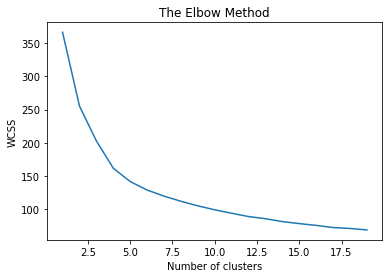

In [235]:
X = OLS[['Alpha','Beta1','Beta2','Beta3','Beta4','Beta5']]

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 420)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [236]:
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_

OLS['K-Mean']=labels
OLS

,Ticker,Alpha,Beta1,Beta2,Beta3,Beta4,Beta5,T_alpha,T_beta1,T_beta2,T_beta3,T_beta4,T_beta5,R-squared,GICS,K-Mean
0,MMM,-0.025972,0.922246,0.001201,0.108525,0.471795,0.431968,-1.582280,56.951802,0.040611,3.791722,10.996040,7.266977,0.558266,Industrials,4
1,AOS,0.021716,0.976488,0.469290,0.029587,0.343371,0.202386,0.949164,43.263173,11.380519,0.741658,5.741662,2.442710,0.463359,Industrials,0
2,ABT,0.006013,0.878301,-0.364557,-0.302177,0.028632,0.265999,0.334378,49.507539,-11.247687,-9.636868,0.609127,4.084598,0.465750,Health Care,4
3,ABBV,0.014744,0.876466,-0.092346,-0.184029,-0.017704,0.078222,0.470200,28.341662,-1.676402,-3.527450,-0.216862,0.713436,0.279260,Health Care,4
4,ABMD,0.061128,0.980350,0.447073,-0.577654,-0.586890,-0.197632,1.287320,20.927061,5.223666,-6.976560,-4.728316,-1.149279,0.203093,Health Care,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,0.005388,0.882305,-0.041083,0.056338,0.394075,-0.004401,0.240311,39.886509,-1.016579,1.440973,6.723694,-0.054203,0.373858,Consumer Discretionary,0
500,ZBRA,0.022588,1.172781,0.426599,-0.260019,0.145308,-0.019977,0.718883,37.833054,7.532593,-4.745755,1.769156,-0.175562,0.383062,Information Technology,3
501,ZBH,-0.025879,0.868765,0.189590,0.183557,0.129501,-0.250416,-1.114835,37.935332,4.531345,4.534811,2.134207,-2.978826,0.393998,Health Care,0
502,ZION,0.020701,0.988328,0.305267,1.580878,-0.696192,-0.625354,0.892600,43.197029,7.303026,39.092854,-11.484277,-7.445943,0.666762,Financials,2


The difference is strictly positive so we can assess that the clustering has indeed led to a better distinction between groups, even if the number of neighborhoods were less than the GICS, 5 VS 11

In [237]:
(OLS.groupby('K-Mean').mean().std()[0:6]-OLS.groupby('GICS').mean().std()[0:6]).sum()

0.5279095218808848

Increase the cluster numbers to 11 to match the GICS. Slightly better result.

In [238]:
km = KMeans(n_clusters=11)
km.fit(X)
km.predict(X)
labels = km.labels_

OLS['K-Mean']=labels
print((OLS.groupby('K-Mean').mean().std()[0:6]-OLS.groupby('GICS').mean().std()[0:6]).sum())

0.5671312514681243


#### ESG Factor (Xtrackers S&P500 ESG ETF)

In [286]:
start = dt.datetime(2019,6,26)
end = dt.datetime(2021,12,31)

ESG_factor = web.get_data_yahoo('SNPE',start, end, interval='m')
ESG_factor = (np.log(ESG_factor['Adj Close']) - np.log(ESG_factor['Adj Close'].shift(1)))*100
ESG_factor=ESG_factor.fillna(0)

In [287]:
monthlyFF = famafrench[famafrench['Date']>20190631]
monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
mff = monthlyFF.groupby('month').sum()
mff['ESG']=np.array(ESG_factor)
mff

<ipython-input-287-5fa8e5fdb959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,ESG
month,,,,,,,,
201907,444195756,1.25,-1.71,0.44,-0.10,0.31,0.198,0.000000
201908,444197953,-2.36,-3.31,-5.13,0.53,-1.00,0.154,-1.516750
201909,403818318,1.44,0.29,6.77,1.90,3.03,0.180,1.236283
201910,464393368,2.12,0.28,-1.85,0.46,-0.97,0.161,2.973079
201911,403822303,3.82,0.41,-1.95,-1.46,-1.40,0.120,3.715222
201912,424015526,2.75,0.92,1.75,0.03,1.21,0.147,2.505116
202001,424202455,-0.04,-4.42,-6.40,-1.22,-2.34,0.126,1.198423
202002,383804093,-8.23,0.04,-4.14,-1.49,-2.80,0.114,-9.759815
202003,444406951,-10.68,-9.38,-15.47,-2.71,0.60,0.132,-12.092805


In [293]:
start = dt.datetime(2019,7,1)
end = dt.datetime(2021,12,31)

ESG_beta=[]
ESG_tvalue=[]
ESG_r_sqrd=[]

for i in modified_tickers:
    try:
        df = web.get_data_yahoo(i,start, end, interval='m')
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(mff['RF'][-ss:])

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA', 'ESG' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    ESG_beta.append(est.params[6])
    ESG_tvalue.append(est.tvalues[6])

    ESG_r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

The t-value is extremely small we fail to reject H0, so that ESG Beta may be equal to 0, thus not relevant in the regression

In [299]:
ESG = pd.DataFrame()

ESG['ESGBeta']=ESG_beta
ESG['ESG_Tvalue']=ESG_tvalue

ESG.describe()

,ESGBeta,ESG_Tvalue
count,504.000000,504.000000
mean,0.386050,0.219644
std,1.917581,1.088371
min,-9.814956,-3.359985
25%,-0.805044,-0.504655
50%,0.453359,0.259865
75%,1.480233,0.932957
max,8.762483,3.578351


#### Momentum Factor (iShares MSCI USA Momentum Factor ETF)

In [300]:
start = dt.datetime(2013,4,18)
end = dt.datetime(2021,12,31)

Momentum = web.get_data_yahoo('MTUM',start, end, interval='m')
Momentum = (np.log(Momentum['Adj Close']) - np.log(Momentum['Adj Close'].shift(1)))*100
Momentum=Momentum.fillna(0)

monthlyFF = famafrench[famafrench['Date']>20130417]
monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
mff = monthlyFF.groupby('month').sum()
mff['Momentum']=np.array(Momentum)
mff

<ipython-input-300-48b4b53c0126>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Momentum
month,,,,,,,,
201304,181173816,3.13,1.37,1.26,0.25,-0.57,0.0,0.000000
201305,442871349,2.84,2.04,2.63,-2.08,-0.77,0.0,0.308181
201306,402612310,-1.10,1.57,0.10,-0.42,0.12,0.0,-1.218933
201307,442875756,5.49,1.71,0.54,-1.33,0.51,0.0,6.191366
201308,442877953,-2.68,-0.02,-2.75,0.65,-2.10,0.0,-3.628632
...,...,...,...,...,...,...,...,...
202108,444637951,2.91,-0.62,-0.04,-0.29,-1.51,0.0,4.036715
202109,424429239,-4.39,1.34,5.22,-2.01,2.17,0.0,-3.711581
202110,424431331,6.51,-2.51,-0.44,1.69,-1.22,0.0,8.238788


In [301]:
start = dt.datetime(2013,4,18)
end = dt.datetime(2021,12,31)

Momentum_beta=[]
Momentum_tvalue=[]
Momentum_r_sqrd=[]

for i in modified_tickers:
    try:
        df = web.get_data_yahoo(i,start, end, interval='m')
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(mff['RF'][-ss:])

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA', 'Momentum' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    Momentum_beta.append(est.params[6])
    Momentum_tvalue.append(est.tvalues[6])

    Momentum_r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

The t-value is really small, being 0.494 so that the Momentum portfolio doesn't seem to be statistically relevant in the regression

In [302]:
Momentum_df = pd.DataFrame()

Momentum_df['Momentum_Beta']=Momentum_beta
Momentum_df['Momentum_tvalue']=Momentum_tvalue

Momentum_df.describe()

,Momentum_Beta,Momentum_tvalue
count,504.000000,504.000000
mean,0.196895,0.494095
std,0.756713,1.455244
min,-8.642341,-3.253148
25%,-0.166156,-0.479217
50%,0.166890,0.457392
75%,0.517796,1.446826
max,3.364854,4.658702


#### US Dollar Strenght (US Dollar/USDX - Index - Cash)

In [304]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

USD = web.get_data_yahoo('DX-Y.NYB',start, end, interval='m')
USD = (np.log(USD['Adj Close']) - np.log(USD['Adj Close'].shift(1)))*100
USD=USD.fillna(0)

monthlyFF = famafrench
monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
mff = monthlyFF.groupby('month').sum()
mff['USD']=np.array(USD)
mff

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,USD
month,,,,,,,,
201001,381902212,-3.34,0.43,0.53,-1.19,0.61,0.000,0.000000
201002,381904055,3.48,1.46,3.20,-0.27,1.36,0.000,1.126281
201003,462307260,6.13,1.78,2.13,-0.64,1.65,0.000,0.879643
201004,422108751,2.08,4.83,2.89,0.60,1.74,0.021,0.981968
201005,402010310,-7.80,0.30,-2.30,1.19,-0.06,0.020,5.605164
...,...,...,...,...,...,...,...,...
202108,444637951,2.91,-0.62,-0.04,-0.29,-1.51,0.000,0.497836
202109,424429239,-4.39,1.34,5.22,-2.01,2.17,0.000,1.733779
202110,424431331,6.51,-2.51,-0.44,1.69,-1.22,0.000,-0.138023


In [305]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

USD_beta=[]
USD_tvalue=[]
USD_r_sqrd=[]

for i in modified_tickers:
    try:
        df = web.get_data_yahoo(i,start, end, interval='m')
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(mff['RF'][-ss:])

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA', 'USD' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    USD_beta.append(est.params[6])
    USD_tvalue.append(est.tvalues[6])

    USD_r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

In [306]:
USD_df = pd.DataFrame()

USD_df['USD_Beta']=USD_beta
USD_df['USD_tvalue']=USD_tvalue

USD_df.describe()

,USD_Beta,USD_tvalue
count,504.000000,504.000000
mean,-0.020005,-0.031673
std,0.393440,1.245282
min,-2.661290,-5.074724
25%,-0.189446,-0.652422
50%,0.014442,0.054003
75%,0.190632,0.733882
max,1.341222,3.415781
